<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 166.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 195.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 139.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 154.1 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)

df.head()


ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]


### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [24]:

df_filtered = df[['Age','JobSatPoints_6']].dropna()



df_filtered['Age'].value_counts()

Age
25-34 years old       12832
35-44 years old        8074
18-24 years old        4324
45-54 years old        2988
55-64 years old         986
65 years or older       119
Under 18 years old       76
Name: count, dtype: int64

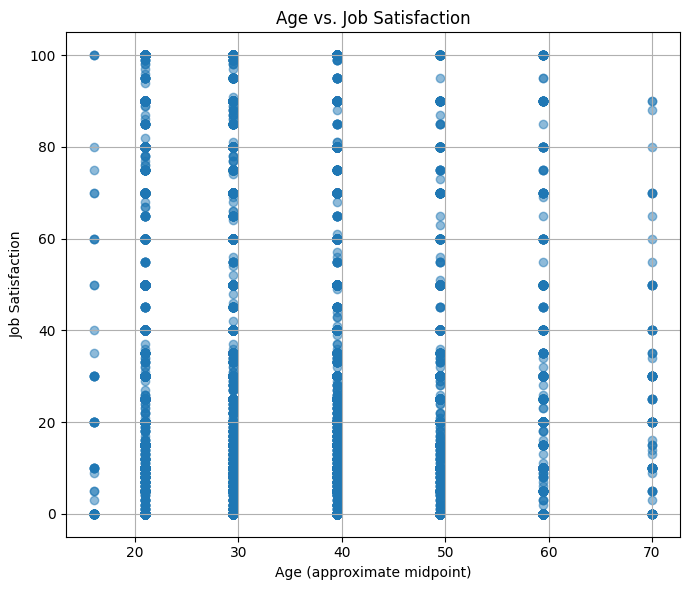

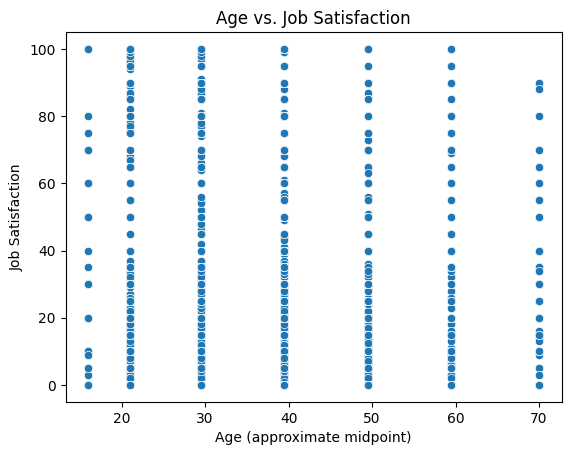

In [4]:
## Write your code here

df_filtered = df[['Age','JobSatPoints_6']].dropna()
df_filtered= df_filtered[df_filtered['Age'] != 'Prefer not to say']

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
  }

df_filtered['Age_numeric'] = df_filtered['Age'].map(age_map)

plt.figure(figsize=(7, 6))
plt.scatter(df_filtered['Age_numeric'], df_filtered['JobSatPoints_6'], alpha=0.5)

plt.xlabel('Age (approximate midpoint)')
plt.ylabel('Job Satisfaction')
plt.title('Age vs. Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

sns.scatterplot(data=df_filtered, x='Age_numeric', y='JobSatPoints_6')
plt.xlabel('Age (approximate midpoint)')
plt.ylabel('Job Satisfaction')
plt.title('Age vs. Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


JobSatPoints_6
0.0     3754
20.0    2507
10.0    1904
30.0    1553
15.0     872
        ... 
96.0       1
91.0       1
56.0       1
41.0       1
74.0       1
Name: count, Length: 83, dtype: int64


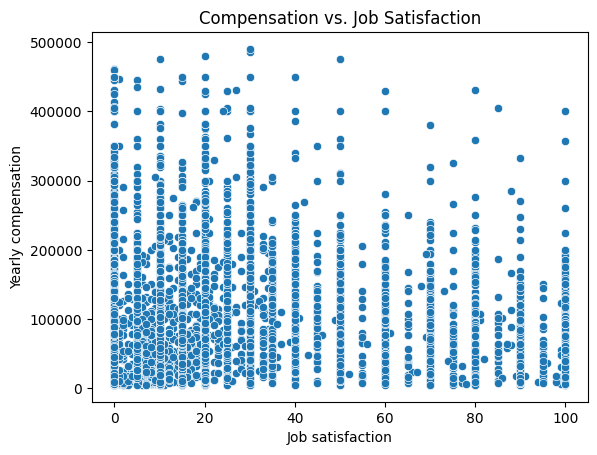

In [7]:
## Write your code here

df_comp_sat = df[['ConvertedCompYearly','JobSatPoints_6']].dropna()

print(df_comp_sat['JobSatPoints_6'].value_counts())

df_filtered_comp = df_comp_sat[(df_comp_sat['ConvertedCompYearly']>5000) & (df_comp_sat['ConvertedCompYearly']<500000)].copy()

sns.scatterplot(data=df_filtered_comp, x='JobSatPoints_6', y='ConvertedCompYearly')
plt.xlabel('Job satisfaction')
plt.ylabel('Yearly compensation')
plt.title('Compensation vs. Job Satisfaction')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


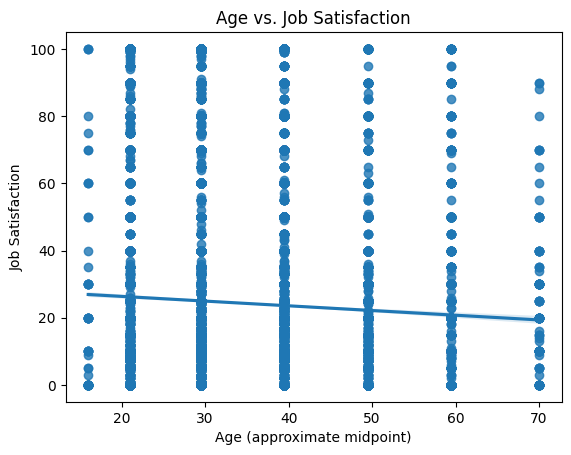

In [8]:
## Write your code here

df_filtered = df[['Age','JobSatPoints_6']].dropna()
df_filtered= df_filtered[df_filtered['Age'] != 'Prefer not to say']

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
  }

df_filtered['Age_numeric'] = df_filtered['Age'].map(age_map)

sns.regplot(data=df_filtered, x='Age_numeric', y='JobSatPoints_6')
plt.xlabel('Age (approximate midpoint)')
plt.ylabel('Job Satisfaction')
plt.title('Age vs. Job Satisfaction')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34                     169
38                     134
33             

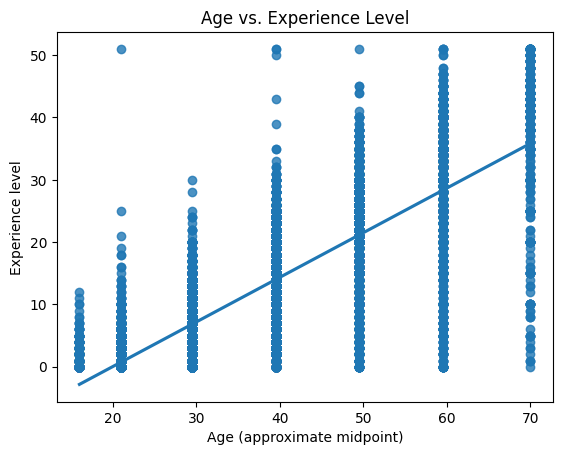

In [11]:
## Write your code here

df_age_exp = df[['Age','YearsCodePro']].dropna()
print(df_age_exp['YearsCodePro'].value_counts())

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
  }

df_age_exp['Age_numeric'] = df_age_exp['Age'].map(age_map)

df_age_exp['YearsCodePro']= df_age_exp['YearsCodePro'].replace({'Less than 1 year':'0', 'More than 50 years': '51'})
df_age_exp['YearsCodePro_num'] = df_age_exp['YearsCodePro'].astype(float)

print(df_age_exp.head())

sns.regplot(data=df_age_exp, x='Age_numeric', y='YearsCodePro_num')
plt.xlabel('Age (approximate midpoint)')
plt.ylabel('Experience level')
plt.title('Age vs. Experience Level')
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


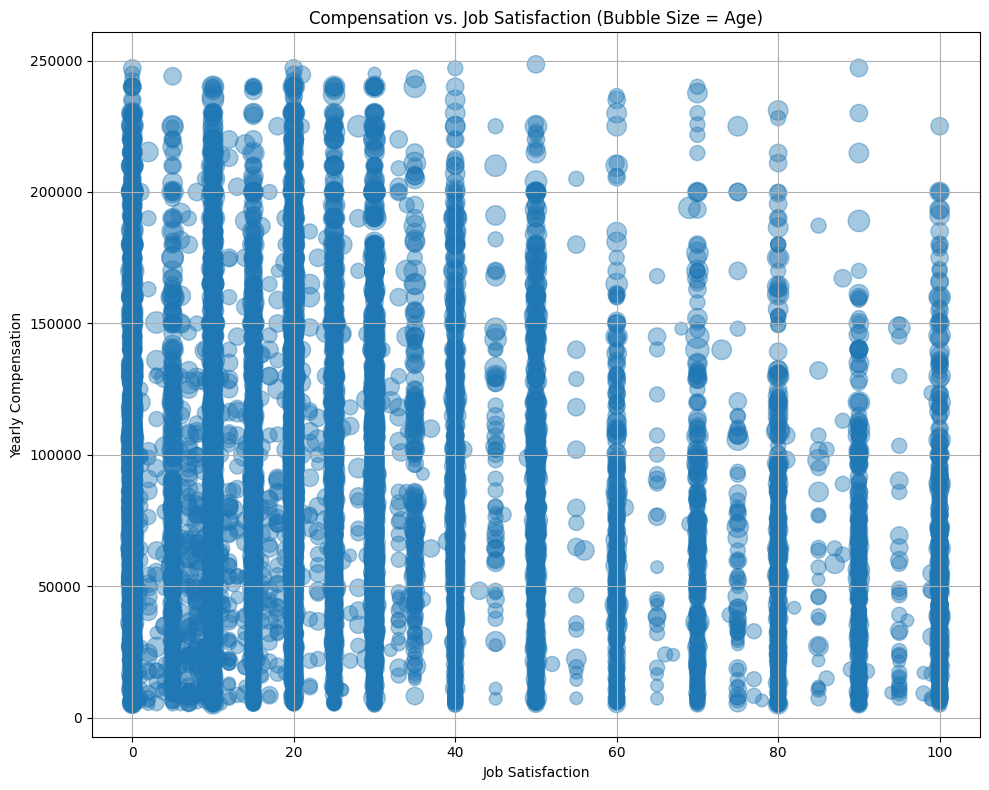

In [3]:
## Write your code here

df_comp_age_sat = df[['ConvertedCompYearly', 'Age', 'JobSatPoints_6']].dropna()
df_comp_age_sat = df_comp_age_sat[df_comp_age_sat['Age'] != 'Prefer not to say']

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
  }

df_comp_age_sat['Age_numeric'] = df_comp_age_sat['Age'].map(age_map)

df_filtered_comp = df_comp_age_sat[(df_comp_age_sat['ConvertedCompYearly']>5000) & (df_comp_age_sat['ConvertedCompYearly']<250000)].copy()

# Bubble plot:  with Age as Bubble Size
plt.figure(figsize=(10, 8))

plt.scatter(
    df_filtered_comp['JobSatPoints_6'],
    df_filtered_comp['ConvertedCompYearly'],
    s=df_filtered_comp['Age_numeric'] * 4,  # множитель масштабирует размер пузырей
    alpha=0.4,
   
)

plt.xlabel('Job Satisfaction')
plt.ylabel('Yearly Compensation')
plt.title('Compensation vs. Job Satisfaction (Bubble Size = Age)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


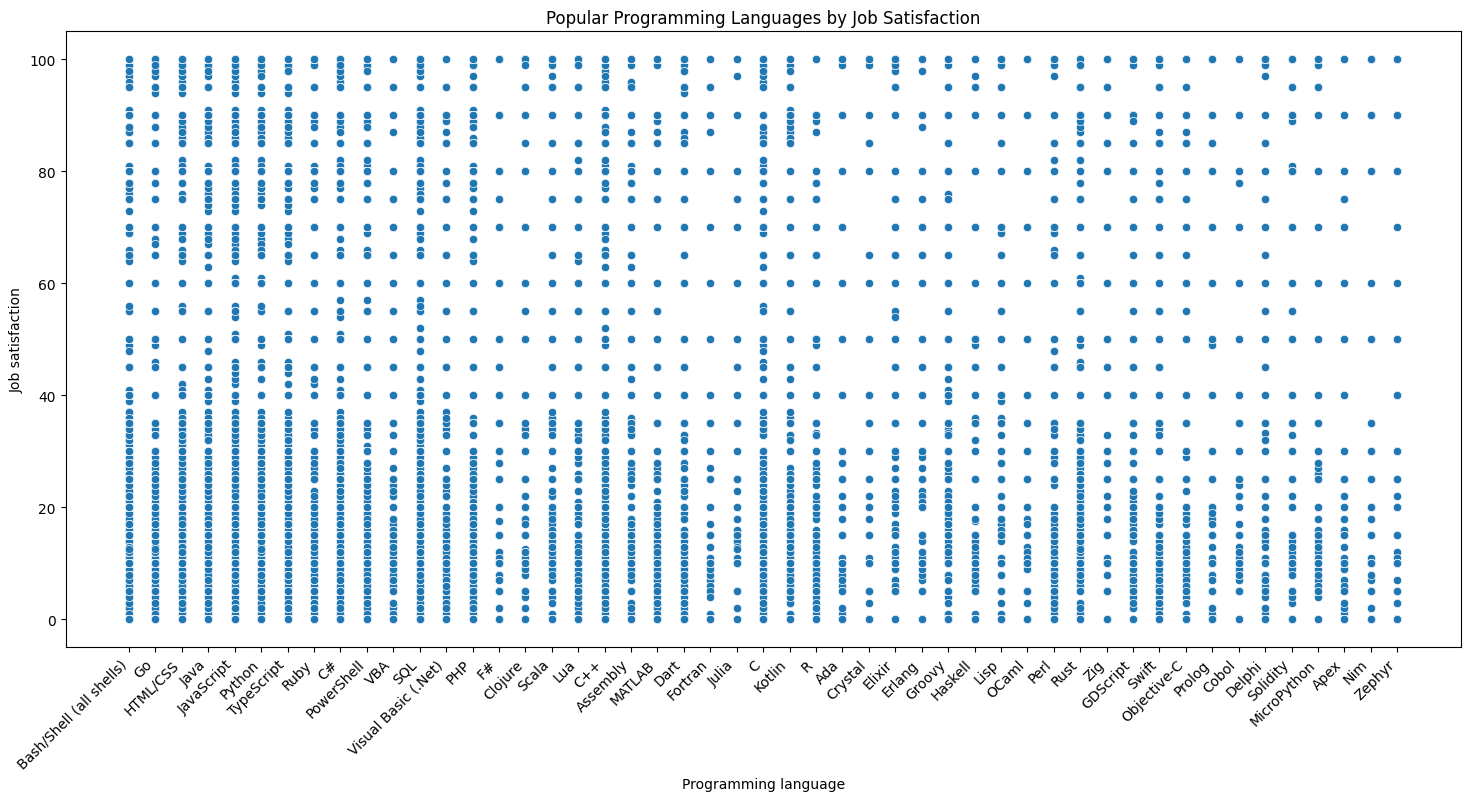

In [21]:
## Write your code here

df_sat_lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()
df_sat_lang['LanguageHaveWorkedWith'].value_counts()

# explode LanguageHaveWorkedWith

df_sat_lang['Language_split'] = df_sat_lang['LanguageHaveWorkedWith'].str.split(';')
df_sat_lang = df_sat_lang.explode('Language_split')
df_sat_lang['Language_split'] = df_sat_lang['Language_split'].str.strip()

plt.figure(figsize=(18, 8))
sns.scatterplot(data=df_sat_lang, x='Language_split', y='JobSatPoints_6')

plt.xlabel('Programming language')
plt.ylabel('Job satisfaction')
plt.title('Popular Programming Languages by Job Satisfaction')
plt.xticks(rotation=45, ha='right')
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


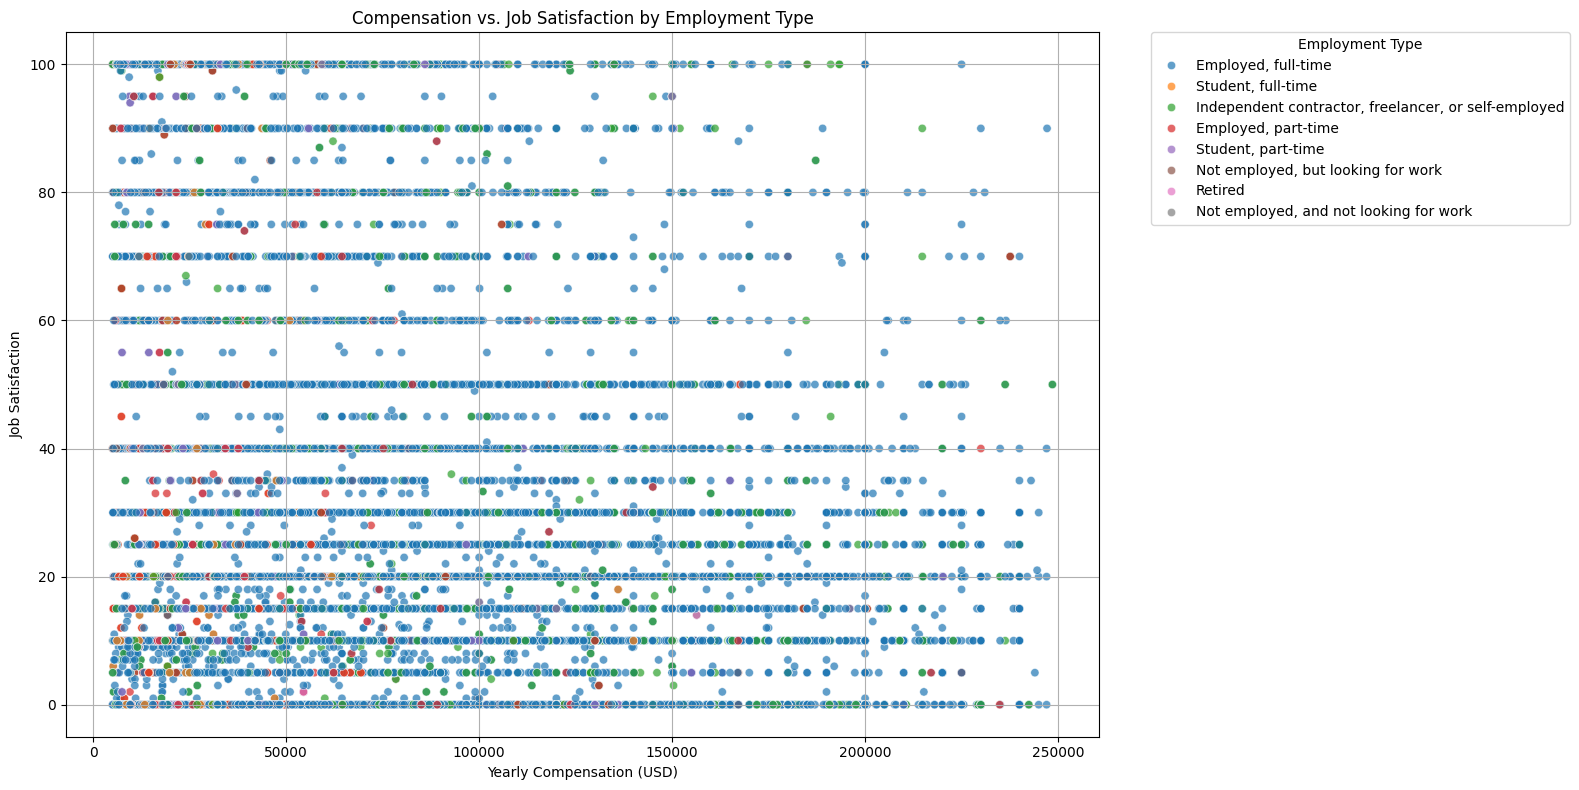

In [29]:
## Write your code here

df_comp_sat_emp = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()
df_comp_sat_emp.value_counts()

df_comp_sat_emp['Employment'] = df_comp_sat_emp['Employment'].str.split(';')
df_comp_sat_emp = df_comp_sat_emp.explode('Employment')
df_comp_sat_emp['Employment'] = df_comp_sat_emp['Employment'].str.strip()

df_filtered_comp_sat_emp = df_comp_sat_emp[(df_comp_sat_emp['ConvertedCompYearly']>5000) & (df_comp_sat_emp['ConvertedCompYearly']<250000)].copy()

df_comp_sat_emp.value_counts()

plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_filtered_comp_sat_emp,
    x="ConvertedCompYearly",
    y="JobSatPoints_6",
    hue="Employment",  # color by employment type
    alpha=0.7
)

plt.title("Compensation vs. Job Satisfaction by Employment Type")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction")

# Отодвигаем легенду вправо, за пределы графика
plt.legend(
    title="Employment Type",
    bbox_to_anchor=(1.05, 1),  # сдвиг по X = 1.05 (вне графика)
    loc='upper left',
    borderaxespad=0.
)

plt.grid(True)
plt.tight_layout() 
plt.show()

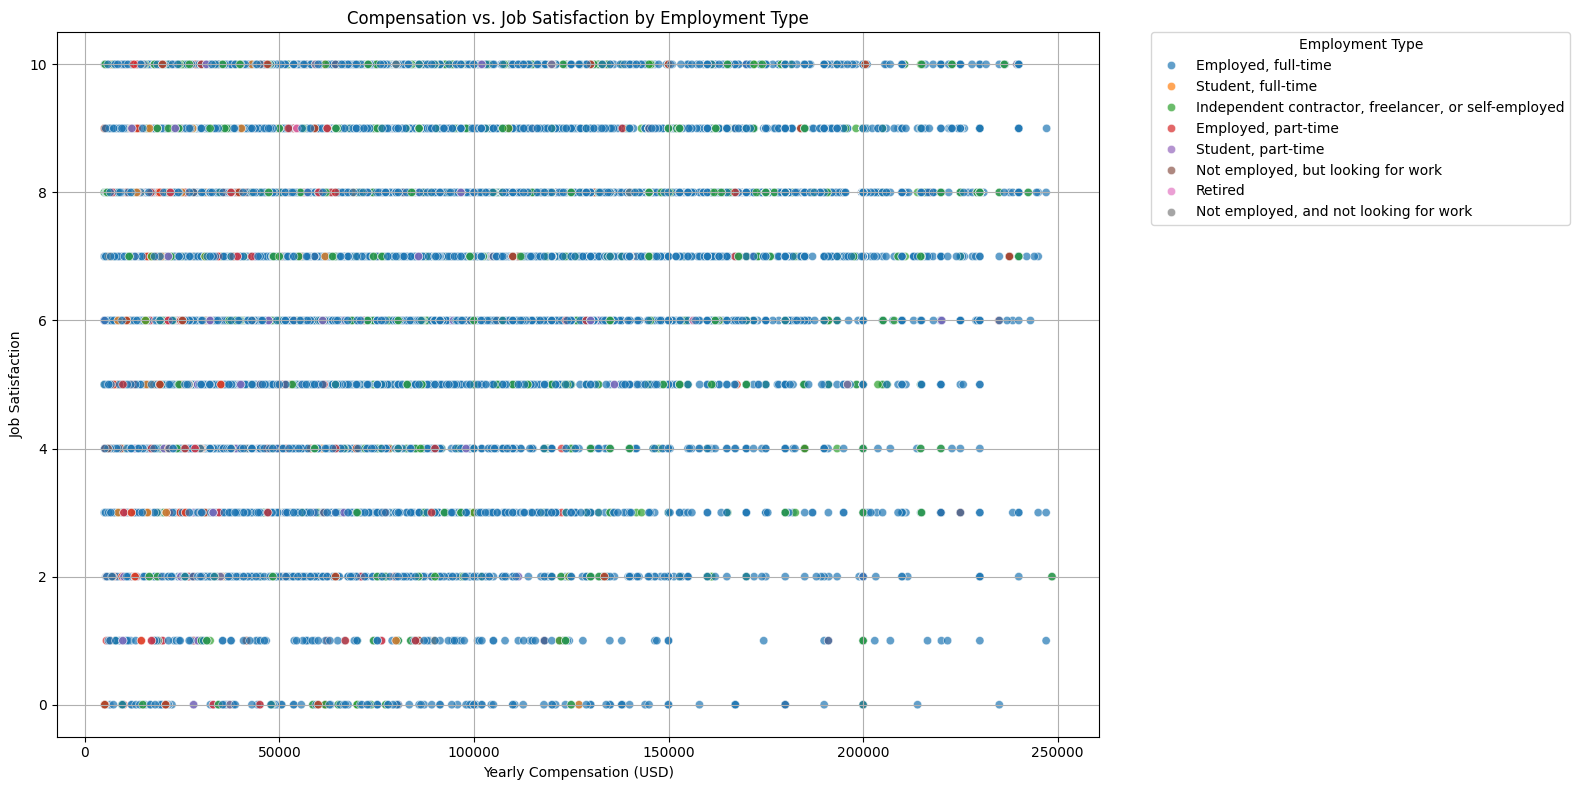

In [30]:
df_comp_sat_emp = df[['ConvertedCompYearly', 'JobSat', 'Employment']].dropna()
df_comp_sat_emp.value_counts()

df_comp_sat_emp['Employment'] = df_comp_sat_emp['Employment'].str.split(';')
df_comp_sat_emp = df_comp_sat_emp.explode('Employment')
df_comp_sat_emp['Employment'] = df_comp_sat_emp['Employment'].str.strip()

df_filtered_comp_sat_emp = df_comp_sat_emp[(df_comp_sat_emp['ConvertedCompYearly']>5000) & (df_comp_sat_emp['ConvertedCompYearly']<250000)].copy()

df_comp_sat_emp.value_counts()

plt.figure(figsize=(16, 8))
sns.scatterplot(
    data=df_filtered_comp_sat_emp,
    x="ConvertedCompYearly",
    y="JobSat",
    hue="Employment",  # color by employment type
    alpha=0.7
)

plt.title("Compensation vs. Job Satisfaction by Employment Type")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction")

# Move legend to the right
plt.legend(
    title="Employment Type",
    bbox_to_anchor=(1.05, 1), 
    loc='upper left',
    borderaxespad=0.
)

plt.grid(True)
plt.tight_layout()  
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_300/2945383165.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


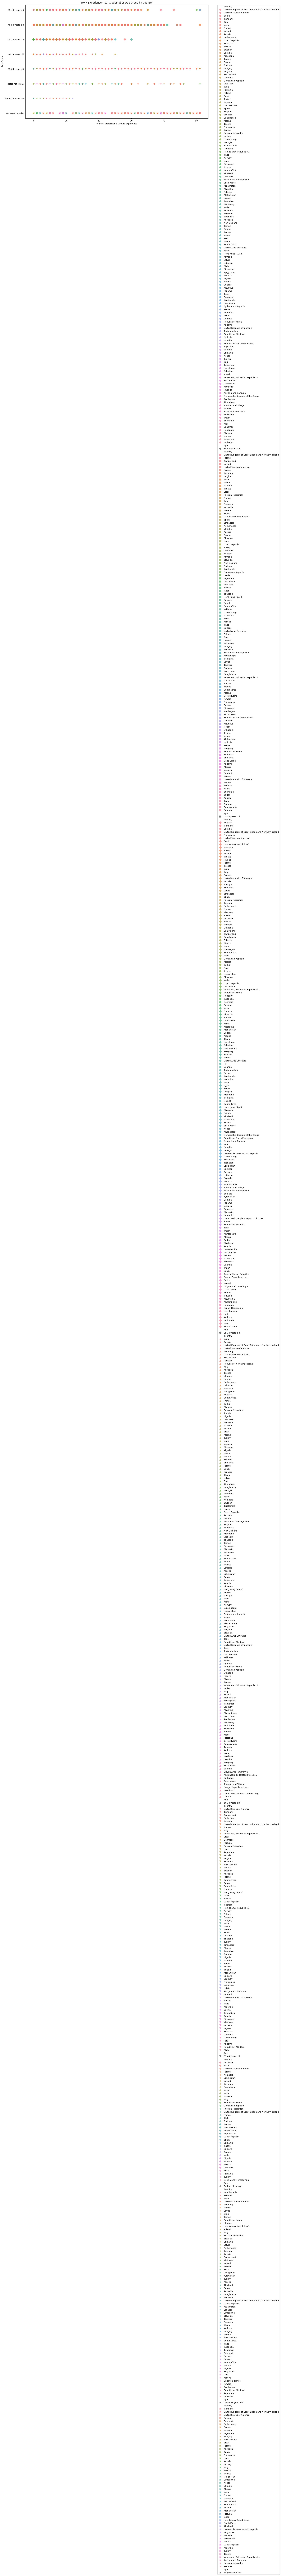

In [34]:
## Write your code here

df_age_exp_country = df[['YearsCodePro', 'Age', 'Country']].dropna()


df_age_exp_country['YearsCodePro']= df_age_exp_country['YearsCodePro'].replace({'Less than 1 year':'0', 'More than 50 years': '51'})
df_age_exp_country['YearsCodePro_num'] = df_age_exp_country['YearsCodePro'].astype(float)

df_age_exp_country.value_counts()

age_groups = df_age_exp_country['Age'].unique()
markers = ['o', 's', 'D', '^', 'v', 'P', '*', 'X']
age_markers = dict(zip(age_groups, markers[:len(age_groups)]))

plt.figure(figsize=(16, 10))

# For each age group create dots with specific marker
for age_group in age_groups:
    subset = df_age_exp_country[df_age_exp_country['Age'] == age_group]
    sns.scatterplot(
        data=subset,
        x='YearsCodePro_num',
        y='Age',
        hue='Country',
        markers=age_markers,
        s=100,
        alpha=0.7,
        legend='full'
    )

plt.title('Work Experience (YearsCodePro) vs Age Group by Country')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age Group')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
